✅ 职业/行业总数（清洗后）：26


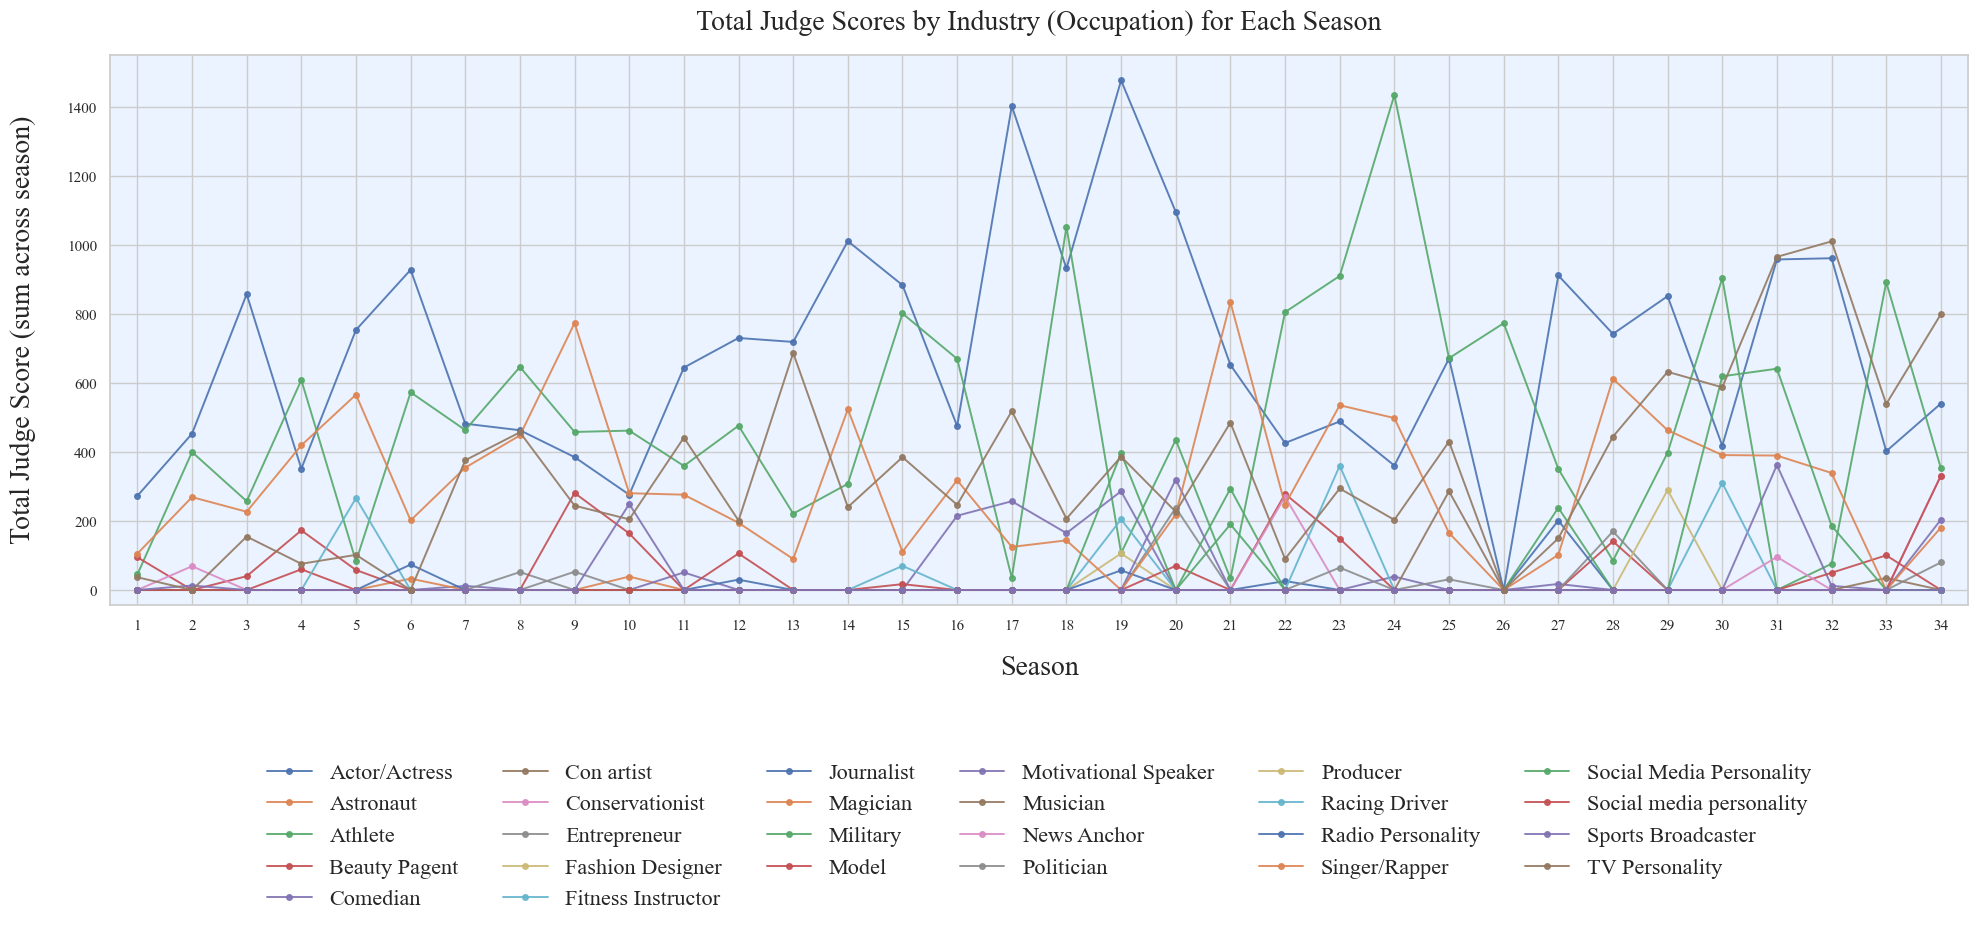

✅ 已导出：industry_total_judge_scores_by_season.png


In [24]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

mpl.rcParams["font.family"] = "Times New Roman"
mpl.rcParams["axes.unicode_minus"] = False

csv_path = "2026_MCM_Problem_C_Data.csv"
df = pd.read_csv(csv_path)

season_col = "season"

df[season_col] = pd.to_numeric(df[season_col], errors="coerce")
df = df[df[season_col].between(1, 34, inclusive="both")].copy()
df[season_col] = df[season_col].astype(int)

df[industry_col] = df[industry_col].astype("string").fillna("Unknown").str.strip()

all_industries = sorted(df[industry_col].unique().tolist())
print(f"✅ 职业/行业总数（清洗后）：{len(all_industries)}")

score_cols = [c for c in df.columns if re.match(r"week\d+_judge\d+_score", c)]
if not score_cols:
    raise ValueError("没找到 weekX_judgeY_score 列，请检查 CSV 列名。")

df["total_judge_score"] = df[score_cols].sum(axis=1, skipna=True)

grouped = (
    df.groupby([season_col, industry_col], as_index=False)["total_judge_score"]
      .sum()
)

pivot = grouped.pivot_table(
    index=season_col,
    columns=industry_col,
    values="total_judge_score",
    aggfunc="sum"
)

pivot = pivot.reindex(range(1, 35))

pivot = pivot.reindex(columns=all_industries)

pivot = pivot.fillna(0)

sns.set_theme(style="whitegrid")

import matplotlib as mpl
mpl.rcParams["font.family"] = "Times New Roman"
mpl.rcParams["axes.unicode_minus"] = False


plt.figure(figsize=(20, 10))
ax = plt.gca()

for ind in pivot.columns:
    ax.plot(
        pivot.index,
        pivot[ind],
        marker="o",
        markersize=4,
        linewidth=1.4,
        alpha=0.9,
        label=str(ind)
    )

ax.set_xlim(0.5, 34.5)

ymax = pivot.max(axis=1).max()
ax.set_ylim(-0.03 * ymax, None)


ax.set_facecolor("#EAF3FF")




ax.set_xticks(range(1, 35))
ax.set_xticklabels(range(1, 35), rotation=0)

ax.set_xlabel("Season", fontsize = 20,
    labelpad=16)
ax.set_ylabel("Total Judge Score (sum across season)", fontsize = 20,
    labelpad=22)
ax.set_title("Total Judge Scores by Industry (Occupation) for Each Season", fontsize = 20,
    pad=18)

ax.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, -0.25),
    fontsize=16,
    frameon=False
)

plt.tight_layout()

out_path = "industry_total_judge_scores_by_season.png"
plt.savefig(out_path, dpi=300, bbox_inches="tight")
plt.show()

print(f"✅ 已导出：{out_path}")


✅ 职业/行业总数（清洗后）：26


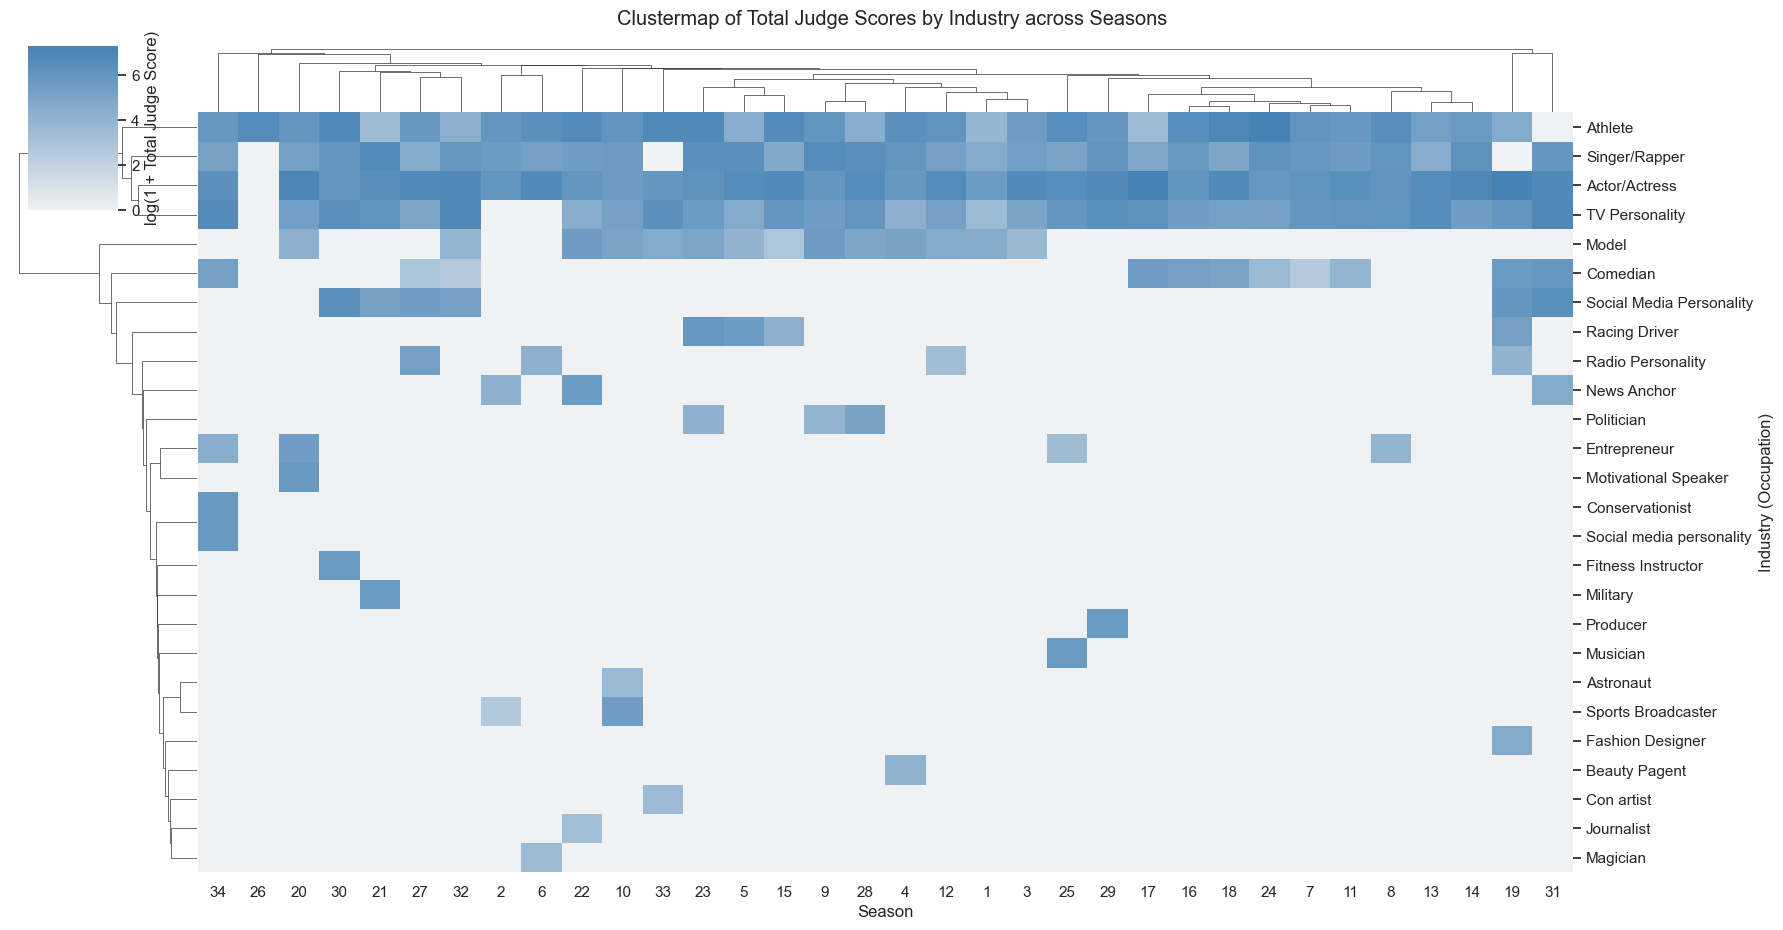

✅ 已导出：clustermap_industry_by_season_log1p.png
✅ 矩阵尺寸：26 industries × 34 seasons


In [17]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

csv_path = "2026_MCM_Problem_C_Data.csv"
df = pd.read_csv(csv_path)

season_col = "season"

df[season_col] = pd.to_numeric(df[season_col], errors="coerce")
df = df[df[season_col].between(1, 34, inclusive="both")].copy()
df[season_col] = df[season_col].astype(int)

df[industry_col] = df[industry_col].astype("string").fillna("Unknown").str.strip()
all_industries = sorted(df[industry_col].unique().tolist())
print(f"✅ 职业/行业总数（清洗后）：{len(all_industries)}")

score_cols = [c for c in df.columns if re.match(r"week\d+_judge\d+_score", c)]
if not score_cols:
    raise ValueError("没找到 weekX_judgeY_score 列，请检查 CSV 列名是否一致。")

df["total_judge_score"] = df[score_cols].sum(axis=1, skipna=True)

grouped = (
    df.groupby([season_col, industry_col], as_index=False)["total_judge_score"]
      .sum()
)

pivot = grouped.pivot_table(
    index=season_col,
    columns=industry_col,
    values="total_judge_score",
    aggfunc="sum"
)

pivot = pivot.reindex(range(1, 35))
pivot = pivot.reindex(columns=all_industries)
pivot = pivot.fillna(0)


sns.set_theme(style="white")


cmap = sns.light_palette("steelblue", as_cmap=True)

fig_w = 18
fig_h = max(8, 0.35 * mat.shape[0])

g = sns.clustermap(
    mat_log,
    cmap=cmap,
    figsize=(fig_w, fig_h),
    linewidths=0.0,
    cbar_kws={"label": "log(1 + Total Judge Score)"},
)

g.ax_heatmap.set_xlabel("Season")
g.ax_heatmap.set_ylabel("Industry (Occupation)")
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), rotation=0)

g.fig.suptitle("Clustermap of Total Judge Scores by Industry across Seasons", y=1.02)

out_path = "clustermap_industry_by_season_log1p.png"
g.fig.savefig(out_path, dpi=300, bbox_inches="tight")
plt.show()

print(f"✅ 已导出：{out_path}")
print(f"✅ 矩阵尺寸：{mat.shape[0]} industries × {mat.shape[1]} seasons")


✅ Using CSV: F:\MCMC\Q3\2026_MCM_Problem_C_Data.csv


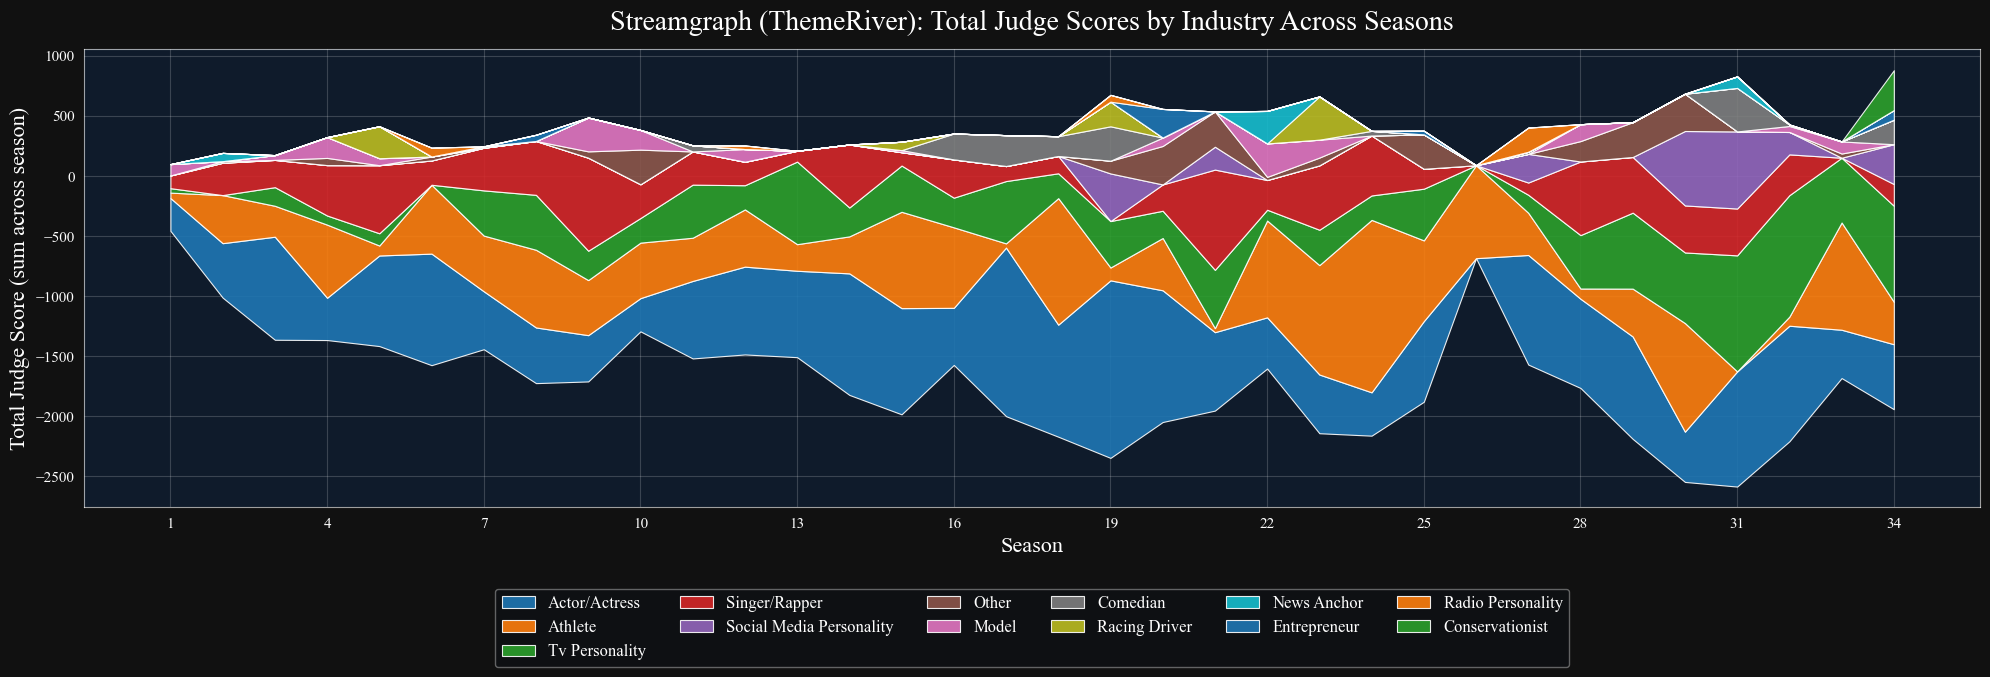

✅ Saved: streamgraph_industry_by_season.png
Detected columns -> season: season | occupation: celebrity_industry | judge_cols: 44


In [4]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

import matplotlib as mpl

mpl.rcParams.update({
    "figure.facecolor": "#0b0f18",
    "axes.facecolor":   "#0f1b2b",
    "savefig.facecolor":"#0b0f18",

    "font.family": "Times New Roman",
    "axes.titlesize": 26,
    "axes.labelsize": 20,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 12,

    "text.color": "white",
    "axes.labelcolor": "white",
    "axes.edgecolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",

    "grid.color": "white",
    "grid.alpha": 0.18,
})



CSV_NAME = "2026_MCM_Problem_C_Data.csv"


FIGSIZE = (20, 7)
OUT_PNG = "streamgraph_industry_by_season.png"
DPI = 300

def find_csv_path(csv_name: str) -> str:
    p1 = Path.cwd() / csv_name
    if p1.exists():
        return str(p1)

    try:
        p2 = Path(__file__).resolve().parent / csv_name
        if p2.exists():
            return str(p2)
    except NameError:
        pass

    hits = list(Path.cwd().rglob(csv_name))
    if hits:
        return str(hits[0])

    raise FileNotFoundError(
        f"❌ 找不到 {csv_name}\n"
        f"请把 CSV 放到当前工作目录：{Path.cwd()}\n"
        f"或手动在代码里设置 CSV_PATH = r'你的完整路径'"
    )

if CSV_PATH is None:
    CSV_PATH = find_csv_path(CSV_NAME)

print("✅ Using CSV:", CSV_PATH)

mpl.rcParams.update({
    "figure.facecolor": "#111111",
    "axes.facecolor":   "#0f1b2b",
    "savefig.facecolor":"#111111",
    "font.family": "Times New Roman",
    "axes.titlepad": 14,
    "axes.titlesize": 20,
    "axes.labelsize": 16,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11
})

df = pd.read_csv(CSV_PATH)

def pick_col(cols, keywords):
    cols_lower = {c: c.lower() for c in cols}
    hits = [c for c, cl in cols_lower.items() if any(k in cl for k in keywords)]
    return hits[0] if hits else None

season_col = pick_col(df.columns, ["season"])
occ_col = (pick_col(df.columns, ["occupation"])
           or pick_col(df.columns, ["industry"])
           or pick_col(df.columns, ["profession"])
           or pick_col(df.columns, ["job"]))

if season_col is None:
    raise ValueError("❌ 没找到 season 列（列名需要包含 'season'）。请检查 CSV 列名。")
if occ_col is None:
    raise ValueError("❌ 没找到 occupation/industry/profession/job 列。请检查 CSV 列名。")

judge_cols = [c for c in df.columns if ("judge" in c.lower() and "score" in c.lower())]
if not judge_cols:
    raise ValueError("❌ 没找到评委分列：需要列名同时包含 'judge' 和 'score'（不区分大小写）。")

df["season_judge_total"] = df[judge_cols].sum(axis=1, skipna=True)

occ_clean = (df[occ_col].astype(str)
             .str.replace(r"\s+", " ", regex=True)
             .str.strip()
             .replace({"nan": np.nan, "None": np.nan, "": np.nan})
             .str.lower()
             .str.title())

df["occ_clean"] = occ_clean

tmp = df.dropna(subset=[season_col, "occ_clean"])
tmp = tmp[tmp["season_judge_total"] > 0]

tmp[season_col] = pd.to_numeric(tmp[season_col], errors="coerce")
tmp = tmp.dropna(subset=[season_col])
tmp[season_col] = tmp[season_col].astype(int)

g = (tmp.groupby([season_col, "occ_clean"], as_index=False)["season_judge_total"].sum())

top_industries = (g.groupby("occ_clean")["season_judge_total"].sum()
                  .sort_values(ascending=False)
                  .head(TOP_N)
                  .index.tolist())

g["occ_top"] = np.where(g["occ_clean"].isin(top_industries), g["occ_clean"], "Other")

g2 = (g.groupby([season_col, "occ_top"], as_index=False)["season_judge_total"].sum())

pivot = (g2.pivot(index=season_col, columns="occ_top", values="season_judge_total")
           .fillna(0.0)
           .sort_index())

pivot = pivot[pivot.sum(axis=0).sort_values(ascending=False).index]

if SMOOTH_WINDOW and SMOOTH_WINDOW > 1:
    pivot = pivot.rolling(window=SMOOTH_WINDOW, center=True, min_periods=1).mean()

x = pivot.index.to_numpy()
Y = pivot.to_numpy().T

fig, ax = plt.subplots(figsize=FIGSIZE)

polys = ax.stackplot(
    x, Y,
    linewidth=0.8,
    alpha=0.9
)

ax.set_title("Streamgraph (ThemeRiver): Total Judge Scores by Industry Across Seasons")
ax.set_xlabel("Season")
ax.set_ylabel("Total Judge Score (sum across season)")

ax.grid(True, alpha=0.18)
for spine in ax.spines.values():
    spine.set_alpha(0.35)

step = 1
if len(x) > 20: step = 2
if len(x) > 30: step = 3
ax.set_xticks(x[::step])

labels = pivot.columns.tolist()



ax.tick_params(colors="white")
for spine in ax.spines.values():
    spine.set_alpha(0.6)

labels = pivot.columns.tolist()
leg = ax.legend(
    polys, labels,
    ncol=6,
    loc="upper center",
    bbox_to_anchor=(0.5, -0.16),
    frameon=True
)

leg.get_frame().set_facecolor("#0b0f18")
leg.get_frame().set_alpha(0.35)
leg.get_frame().set_edgecolor("white")
for t in leg.get_texts():
    t.set_color("white")




plt.tight_layout()
plt.savefig(OUT_PNG, dpi=DPI, bbox_inches="tight")
plt.show()

print(f"✅ Saved: {OUT_PNG}")
print(f"Detected columns -> season: {season_col} | occupation: {occ_col} | judge_cols: {len(judge_cols)}")


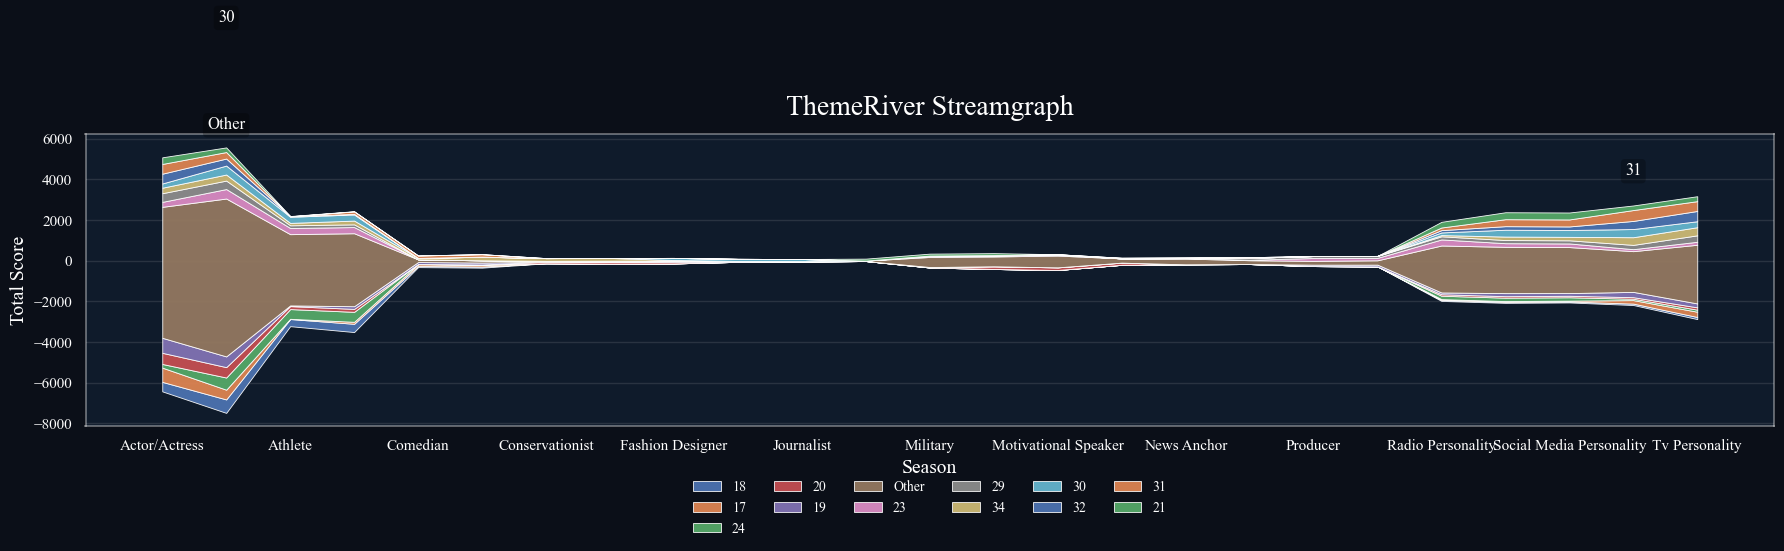

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

def streamgraph_pro(
    pivot: pd.DataFrame,
    top_n: int = 12,
    smooth_window: int = 3,
    other_name: str = "Other",
    dark: bool = True,
    title: str = "ThemeRiver Streamgraph",
    xlabel: str = "Season",
    ylabel: str = "Total Score",
    out_png: str | None = None,
    dpi: int = 300,
    annotate_top_k: int = 3,
):
    """
    pivot: index=Season (ascending), columns=category, values=score
    """

    df = pivot.copy().fillna(0.0)
    df = df.sort_index()
    keep = df.sum(axis=0).sort_values(ascending=False).head(top_n).index
    other = df.drop(columns=keep, errors="ignore").sum(axis=1)
    df = df[keep].copy()
    if other.sum() > 0:
        df[other_name] = other

    if smooth_window and smooth_window > 1:
        df = df.rolling(window=smooth_window, center=True, min_periods=1).mean()

    x = np.arange(len(df.index))
    weights = df.to_numpy()
    col_centroid = {}
    for j, c in enumerate(df.columns):
        w = weights[:, j]
        col_centroid[c] = (x @ w) / (w.sum() + 1e-9)
    order = sorted(df.columns, key=lambda c: (col_centroid[c], -df[c].sum()))
    df = df[order]

    if dark:
        mpl.rcParams.update({
            "figure.facecolor": "#0b0f18",
            "axes.facecolor":   "#0f1b2b",
            "savefig.facecolor":"#0b0f18",
            "font.family": "Times New Roman",
            "text.color": "white",
            "axes.labelcolor": "white",
            "xtick.color": "white",
            "ytick.color": "white",
            "axes.edgecolor": "white",
        })
        grid_alpha = 0.14
    else:
        grid_alpha = 0.25

    seasons = df.index.to_numpy()

    fig, ax = plt.subplots(figsize=(18, 7))
    polys = ax.stackplot(
        seasons, Y,
        linewidth=0.6,
        alpha=0.95
    )

    ax.set_title(title, fontsize=20, pad=14)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)

    ax.grid(True, axis="y", alpha=grid_alpha)
    for sp in ax.spines.values():
        sp.set_alpha(0.4)

    if len(seasons) > 24:
        step = 2
    elif len(seasons) > 34:
        step = 3
    else:
        step = 1
    ax.set_xticks(seasons[::step])

    if annotate_top_k and annotate_top_k > 0:
        cols_for_rank = [c for c in df.columns if c != other_name] + ([other_name] if other_name in df.columns else [])
        topk = df[cols_for_rank].sum(axis=0).sort_values(ascending=False).head(annotate_top_k).index.tolist()

        cum = np.cumsum(Y, axis=0)
        lower = np.vstack([np.zeros_like(seasons, dtype=float), cum[:-1]])
        mid = (lower + cum) / 2.0

        name_to_idx = {c:i for i,c in enumerate(df.columns)}
        for name in topk:
            i = name_to_idx[name]
            j = int(np.argmax(Y[i]))
            ax.text(
                seasons[j], mid[i, j],
                name,
                fontsize=12,
                ha="center", va="center",
                bbox=dict(boxstyle="round,pad=0.25", facecolor="black" if dark else "white", alpha=0.25, edgecolor="none")
            )

    ax.legend(
        polys, df.columns.tolist(),
        ncol=6,
        loc="upper center",
        bbox_to_anchor=(0.5, -0.14),
        frameon=False,
        fontsize=10
    )

    plt.tight_layout()

    if out_png:
        plt.savefig(out_png, dpi=dpi, bbox_inches="tight")
    plt.show()


streamgraph_pro(pivot, top_n=12, smooth_window=3, out_png="river_pro.png")


C:\Users\Jimmy Che\AppData\Local\Temp\ipykernel_4192\668352115.py:74: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmaps = [get_cmap("tab20"), get_cmap("tab20b"), get_cmap("tab20c")]


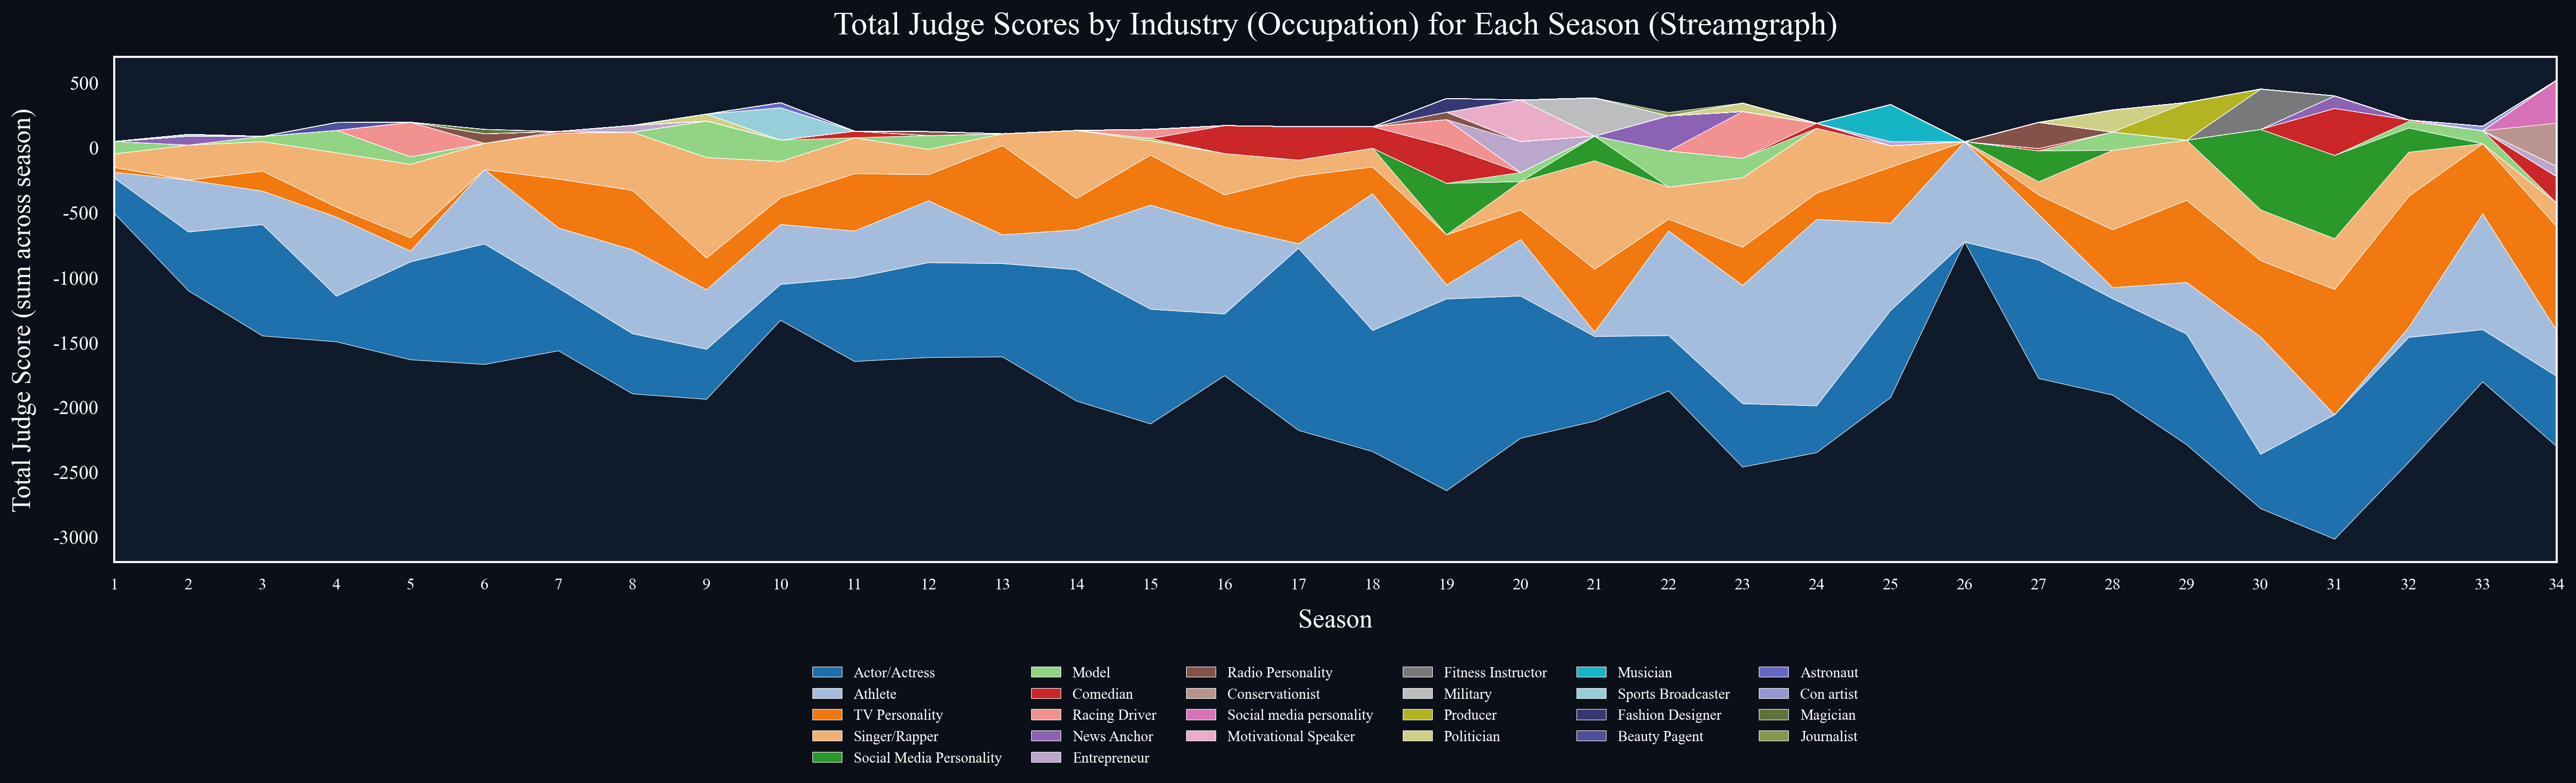

✅ 已保存：streamgraph_total_judge_by_industry.png
使用列：season_col=season, industry_col=celebrity_industry, judge_cols=44 列


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.cm import get_cmap

CSV_PATH = "2026_MCM_Problem_C_Data.csv"
df = pd.read_csv(CSV_PATH)

season_candidates = [c for c in df.columns if c.lower() == "season"]
if not season_candidates:
    raise ValueError("没找到 season 列（期望列名为 'season'）。")
season_col = season_candidates[0]

industry_candidates = [c for c in df.columns if c.lower() in ["celebrity_industry", "industry", "occupation", "profession"]]
if not industry_candidates:
    industry_candidates = [c for c in df.columns if any(k in c.lower() for k in ["industry", "occupation", "profession"])]
if not industry_candidates:
    raise ValueError("没找到职业/行业列（例如 celebrity_industry / occupation / industry）。")
industry_col = industry_candidates[0]

judge_cols = [c for c in df.columns if ("judge" in c.lower() and "score" in c.lower())]
if not judge_cols:
    raise ValueError("没找到 judge score 列（期望列名包含 'judge' 和 'score'）。")

tmp = df.copy()
tmp["season_judge_total"] = tmp[judge_cols].sum(axis=1, skipna=True)

pivot = (
    tmp.groupby([season_col, industry_col], dropna=False)["season_judge_total"]
       .sum()
       .unstack(fill_value=0)
)

pivot = pivot.sort_index()
all_seasons = np.arange(int(pivot.index.min()), int(pivot.index.max()) + 1)
pivot = pivot.reindex(all_seasons, fill_value=0)

industry_order = pivot.sum(axis=0).sort_values(ascending=False).index.tolist()
pivot = pivot[industry_order]

mpl.rcParams["font.family"] = "Times New Roman"
mpl.rcParams["axes.unicode_minus"] = False

x = pivot.index.to_numpy()
ys = [pivot[c].to_numpy() for c in pivot.columns]
labels = pivot.columns.tolist()

n = len(labels)
cmaps = [get_cmap("tab20"), get_cmap("tab20b"), get_cmap("tab20c")]
colors = []
for cmap in cmaps:
    for i in range(cmap.N):
        colors.append(cmap(i))
colors = colors[:n] if len(colors) >= n else colors

fig, ax = plt.subplots(figsize=(22, 7), dpi=220)

ax.stackplot(
    x, ys,
    labels=labels,
    colors=colors,
    linewidth=0.35,
    edgecolor="white",
    alpha=0.95
)

ax.set_title("Total Judge Scores by Industry (Occupation) for Each Season (Streamgraph)", fontsize=20, pad=14)
ax.set_xlabel("Season", fontsize=16, labelpad=10)
ax.set_ylabel("Total Judge Score (sum across season)", fontsize=16, labelpad=10)

ax.set_xlim(x.min(), x.max())
ax.set_xticks(x)
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=12)

ncol = 6 if n >= 18 else 4
ax.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, -0.18),
    ncol=ncol,
    frameon=False,
    fontsize=9
)

plt.tight_layout()

OUT_PNG = "streamgraph_total_judge_by_industry.png"
plt.savefig(OUT_PNG, bbox_inches="tight")
plt.show()

print(f"✅ 已保存：{OUT_PNG}")
print(f"使用列：season_col={season_col}, industry_col={industry_col}, judge_cols={len(judge_cols)} 列")


C:\Users\Jimmy Che\AppData\Local\Temp\ipykernel_4192\174091416.py:93: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmaps = [get_cmap("tab20"), get_cmap("tab20b"), get_cmap("tab20c")]


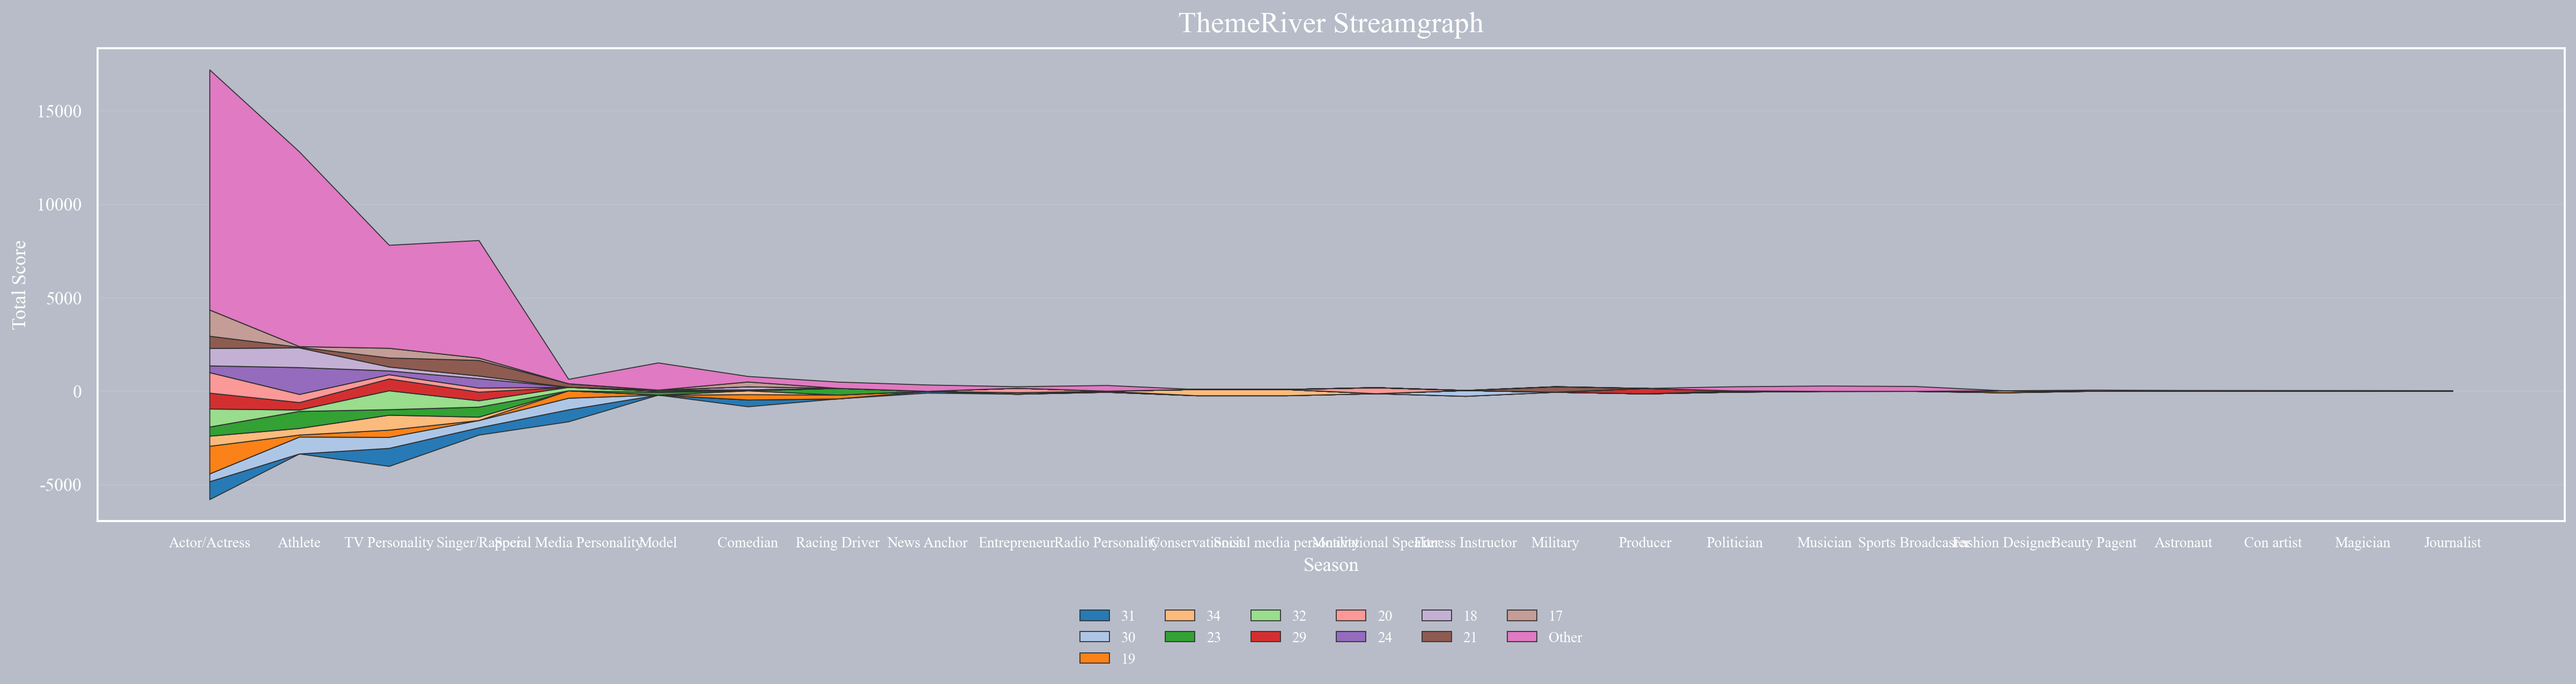

✅ Saved: themeriver_by_industry_layers_seasons.png


<Figure size 640x480 with 0 Axes>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.cm import get_cmap

CSV_PATH = "2026_MCM_Problem_C_Data.csv"
df = pd.read_csv(CSV_PATH)

season_col = "season" if "season" in df.columns else None
if season_col is None:
    raise ValueError("没找到 season 列（期望列名为 'season'）。")

industry_candidates = [c for c in df.columns if c.lower() in ["celebrity_industry", "industry", "occupation", "profession"]]
if not industry_candidates:
    industry_candidates = [c for c in df.columns if any(k in c.lower() for k in ["industry", "occupation", "profession"])]
if not industry_candidates:
    raise ValueError("没找到行业/职业列（例如 celebrity_industry / occupation / industry）。")
industry_col = industry_candidates[0]

judge_cols = [c for c in df.columns if ("judge" in c.lower() and "score" in c.lower())]
if not judge_cols:
    raise ValueError("没找到 judge score 列（列名需同时包含 'judge' 和 'score'）。")

tmp = df.copy()
tmp["season_judge_total"] = tmp[judge_cols].sum(axis=1, skipna=True)

pivot = (
    tmp.groupby([season_col, industry_col], dropna=False)["season_judge_total"]
       .sum()
       .unstack(fill_value=0)
)

pivot = pivot.sort_index()


season_totals = pivot.sum(axis=1).sort_values(ascending=False)
keep_seasons = season_totals.head(TOP_SEASONS).index.tolist()

pivot_keep = pivot.loc[keep_seasons].copy()

if ADD_OTHER:
    other_seasons = [s for s in pivot.index if s not in keep_seasons]
    if len(other_seasons) > 0:
        other_row = pivot.loc[other_seasons].sum(axis=0)
        pivot_keep.loc["Other"] = other_row


pivot_plot = pivot_plot.loc[pivot_plot.sum(axis=1).sort_values(ascending=False).index]

industries = pivot_plot.index.tolist()
x = np.arange(len(industries))

mpl.rcParams["font.family"] = "Times New Roman"
mpl.rcParams["axes.unicode_minus"] = False

fig, ax = plt.subplots(figsize=(22, 6), dpi=220)

fig.patch.set_facecolor("#B7BCC8")
ax.set_facecolor("#B7BCC8")

cmaps = [get_cmap("tab20"), get_cmap("tab20b"), get_cmap("tab20c")]
colors = []
for cmap in cmaps:
    for i in range(cmap.N):
        colors.append(cmap(i))
colors = colors[:len(layers)]

ys = [pivot_plot[c].to_numpy() for c in layers]

polys = ax.stackplot(
    x, ys,
    colors=colors,
    linewidth=0.6,
    edgecolor="#2f2f2f",
    alpha=0.95,
    labels=[str(s) for s in layers]
)

ax.set_title("ThemeRiver Streamgraph", fontsize=18, pad=10)
ax.set_ylabel("Total Score", fontsize=12)

ax.set_xticks(x)
ax.set_xticklabels(industries, rotation=0, ha="center", fontsize=9)

ax.grid(True, axis="y", alpha=0.30)

ncol = 8 if len(layers) >= 16 else 6
ax.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, -0.16),
    ncol=ncol,
    frameon=False,
    fontsize=9
)

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)

OUT_PNG = "themeriver_by_industry_layers_seasons.png"
plt.savefig(OUT_PNG, bbox_inches="tight")
plt.show()

print("✅ Saved:", OUT_PNG)

ANNOTATE_TOP = 2
try:
    for i, name in enumerate(layers):
        if name not in to_annotate:
            continue
        path = polys[i].get_paths()[0]
        verts = path.vertices
        xs = verts[:, 0]
        ys_v = verts[:, 1]
        j = np.argmax(ys_v)
        ax.text(xs[j], ys_v[j], str(name), fontsize=10, ha="center", va="bottom", color="#2b2b2b")
    plt.savefig("themeriver_with_annotations.png", bbox_inches="tight")
except Exception as e:
    print("（可选标注失败不影响主图）", repr(e))


C:\Users\Jimmy Che\AppData\Local\Temp\ipykernel_4192\1722034190.py:95: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmaps = [get_cmap("tab20"), get_cmap("tab20b"), get_cmap("tab20c")]


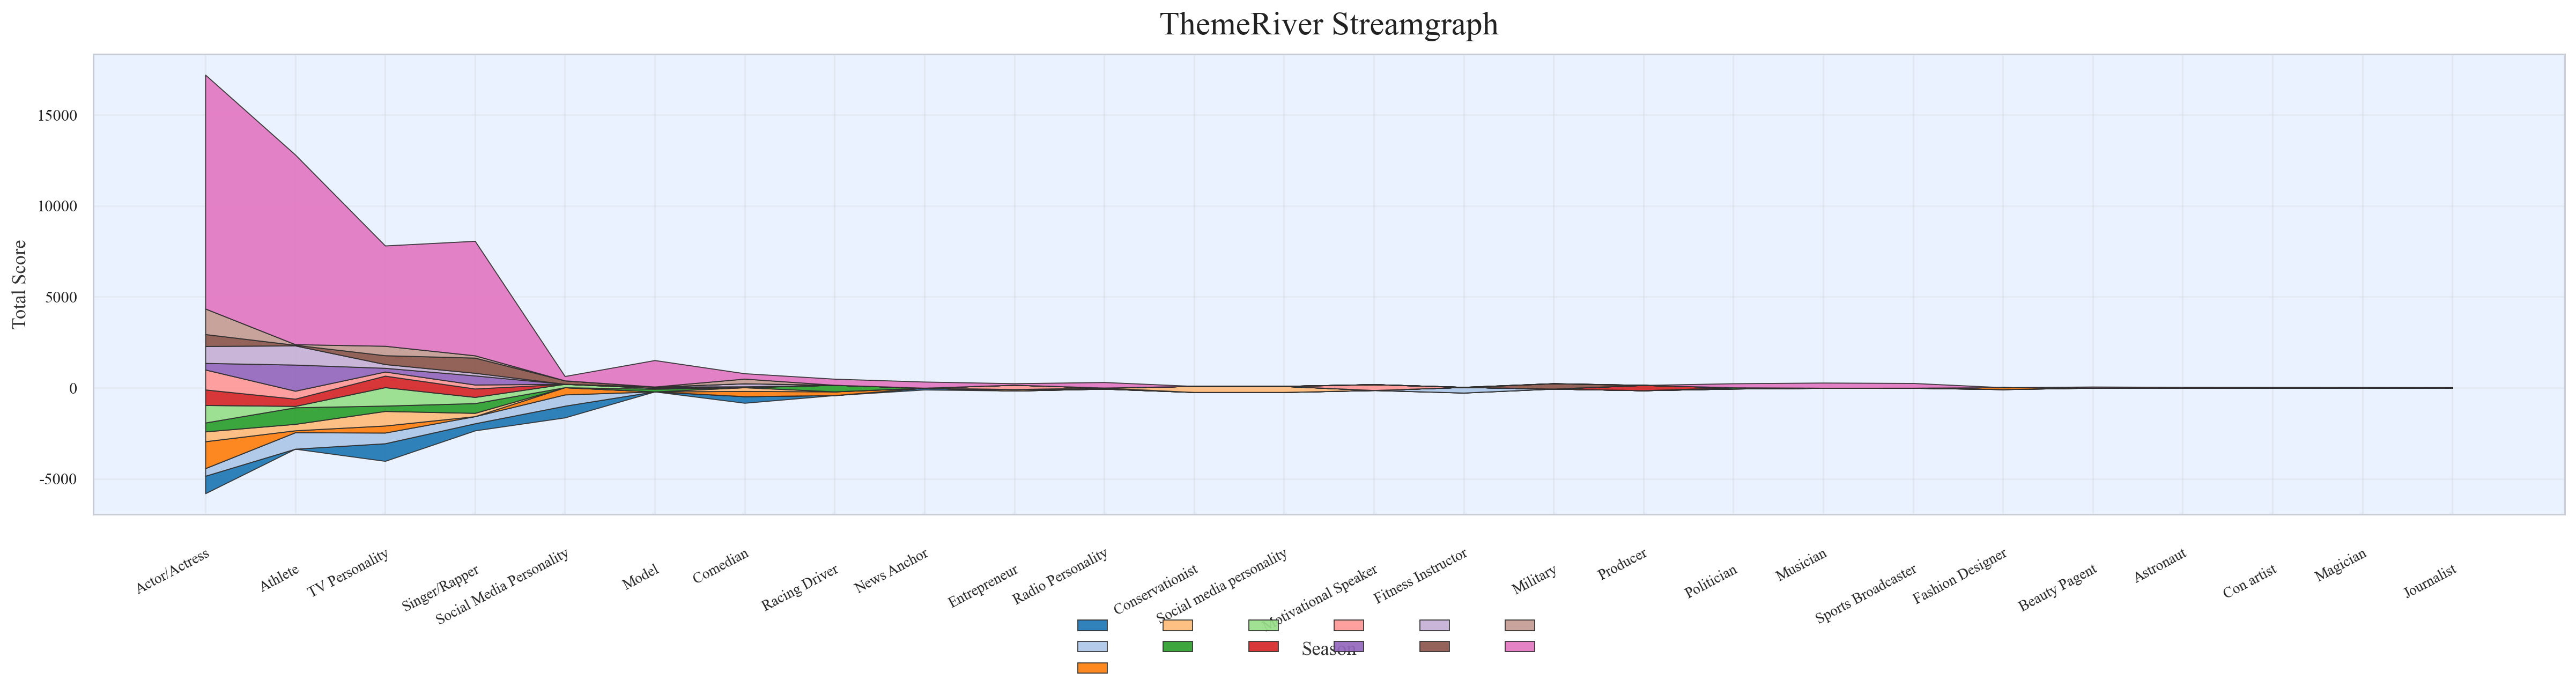

✅ Saved: themeriver_streamgraph_clean_bg_xtilt.png


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.cm import get_cmap

CSV_PATH = "2026_MCM_Problem_C_Data.csv"
df = pd.read_csv(CSV_PATH)

if "season" not in df.columns:
    raise ValueError("没找到 season 列（期望列名为 'season'）。")
season_col = "season"

industry_candidates = [c for c in df.columns if c.lower() in ["celebrity_industry", "industry", "occupation", "profession"]]
if not industry_candidates:
    industry_candidates = [c for c in df.columns if any(k in c.lower() for k in ["industry", "occupation", "profession"])]
if not industry_candidates:
    raise ValueError("没找到行业/职业列（例如 celebrity_industry / occupation / industry）。")
industry_col = industry_candidates[0]

judge_cols = [c for c in df.columns if ("judge" in c.lower() and "score" in c.lower())]
if not judge_cols:
    raise ValueError("没找到 judge score 列（列名需同时包含 'judge' 和 'score'）。")

tmp = df.copy()
tmp["season_judge_total"] = tmp[judge_cols].sum(axis=1, skipna=True)

pivot = (
    tmp.groupby([season_col, industry_col], dropna=False)["season_judge_total"]
       .sum()
       .unstack(fill_value=0)
).sort_index()

ADD_OTHER = True

season_totals = pivot.sum(axis=1).sort_values(ascending=False)
keep_seasons = season_totals.head(TOP_SEASONS).index.tolist()

pivot_keep = pivot.loc[keep_seasons].copy()

if ADD_OTHER:
    other_seasons = [s for s in pivot.index if s not in keep_seasons]
    if other_seasons:
        pivot_keep.loc["Other"] = pivot.loc[other_seasons].sum(axis=0)

pivot_plot = pivot_plot.loc[pivot_plot.sum(axis=1).sort_values(ascending=False).index]

industries = pivot_plot.index.tolist()
layers = pivot_plot.columns.tolist()
x = np.arange(len(industries))
ys = [pivot_plot[c].to_numpy() for c in layers]

mpl.rcParams["font.family"] = "Times New Roman"
mpl.rcParams["axes.unicode_minus"] = False

fig, ax = plt.subplots(figsize=(22, 6), dpi=220)

FIG_BG = "#F5F6FA"
AX_BG  = "#FFFFFF"
fig.patch.set_facecolor("white")
ax.set_facecolor("#EAF2FF")
ax.grid(True, axis="both", alpha=0.25)

for spine in ax.spines.values():
    spine.set_color("#C9CDD6")
    spine.set_linewidth(1.0)
ax.grid(True, axis="y", alpha=0.20)

cmaps = [get_cmap("tab20"), get_cmap("tab20b"), get_cmap("tab20c")]
colors = []
for cmap in cmaps:
    for i in range(cmap.N):
        colors.append(cmap(i))
colors = colors[:len(layers)]

polys = ax.stackplot(
    x, ys,
    colors=colors,
    baseline="wiggle",
    linewidth=0.6,
    edgecolor="#2f2f2f",
    alpha=0.92,
    labels=[str(s) for s in layers]
)

ax.set_title("ThemeRiver Streamgraph", fontsize=20, pad=12, color="#222222")
ax.set_xlabel("Season", fontsize=12, color="#333333")
ax.set_ylabel("Total Score", fontsize=12, color="#333333")

ax.set_xticks(x)

ax.set_xticklabels(industries, fontsize=9, color="#222222")

plt.setp(ax.get_xticklabels(), rotation=28, ha="right", rotation_mode="anchor")

for i, lab in enumerate(ax.get_xticklabels()):
    lab.set_y(-0.035 if i % 2 == 0 else -0.070)

ax.tick_params(axis="y", labelsize=10, colors="#222222")
ax.tick_params(axis="x", colors="#222222")

ncol = 8 if len(layers) >= 16 else 6
ax.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, -0.20),
    ncol=ncol,
    frameon=False,
    fontsize=9
)

plt.tight_layout()
plt.subplots_adjust(bottom=0.26)

OUT_PNG = "themeriver_streamgraph_clean_bg_xtilt.png"
plt.savefig(OUT_PNG, bbox_inches="tight")
plt.show()

print("✅ Saved:", OUT_PNG)


C:\Users\Jimmy Che\AppData\Local\Temp\ipykernel_4192\450455707.py:112: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmaps = [get_cmap("tab20"), get_cmap("tab20b"), get_cmap("tab20c")]


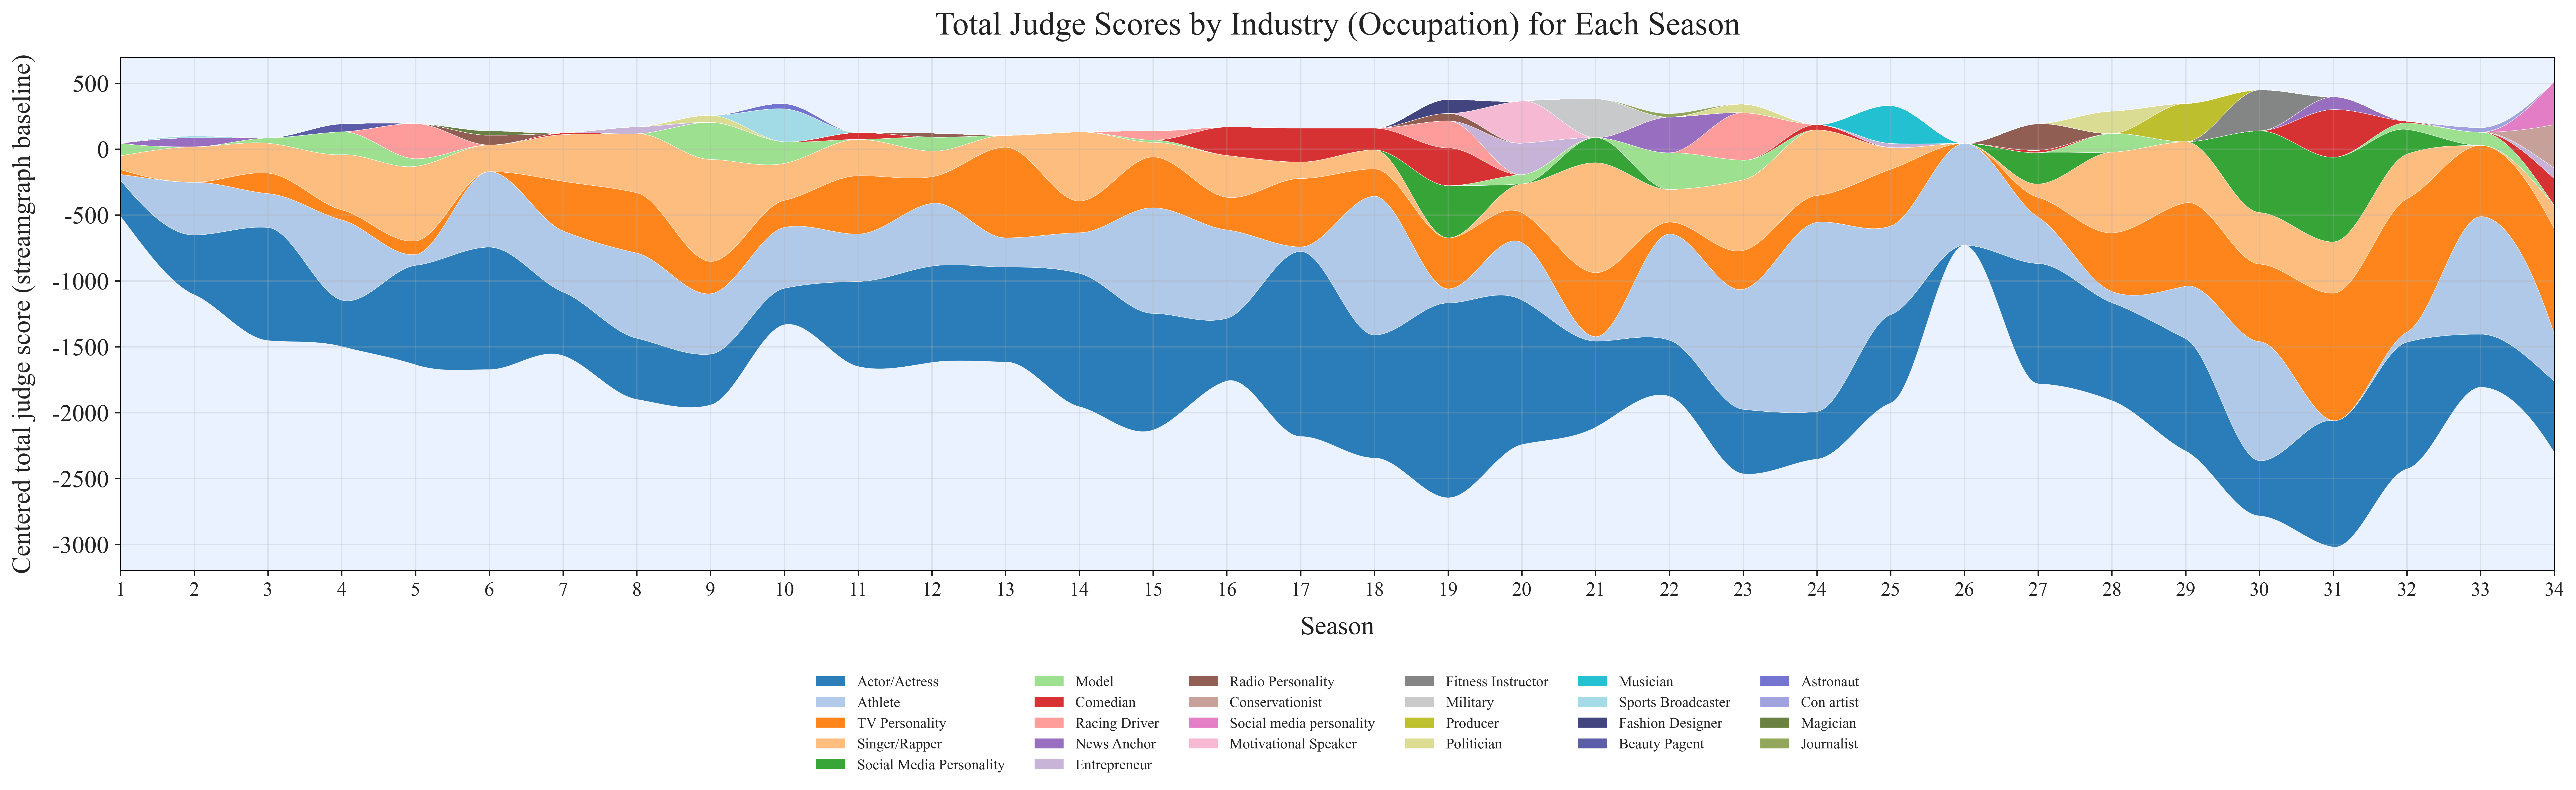

✅ 已保存：streamgraph_total_judge_by_industry_smooth.png
平滑方式： PCHIP（推荐）


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.cm import get_cmap

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use("default")
mpl.rcParams.update(mpl.rcParamsDefault)

mpl.rcParams["text.color"] = "#222222"
mpl.rcParams["axes.labelcolor"] = "#222222"
mpl.rcParams["axes.titlecolor"] = "#222222"
mpl.rcParams["xtick.color"] = "#222222"
mpl.rcParams["ytick.color"] = "#222222"
mpl.rcParams["font.family"] = "Times New Roman"
mpl.rcParams["axes.unicode_minus"] = False



CSV_PATH = "2026_MCM_Problem_C_Data.csv"
df = pd.read_csv(CSV_PATH)

season_candidates = [c for c in df.columns if c.lower() == "season"]
if not season_candidates:
    raise ValueError("没找到 season 列（期望列名为 'season'）。")
season_col = season_candidates[0]

industry_candidates = [c for c in df.columns if c.lower() in ["celebrity_industry", "industry", "occupation", "profession"]]
if not industry_candidates:
    industry_candidates = [c for c in df.columns if any(k in c.lower() for k in ["industry", "occupation", "profession"])]
if not industry_candidates:
    raise ValueError("没找到职业/行业列（例如 celebrity_industry / occupation / industry）。")
industry_col = industry_candidates[0]

judge_cols = [c for c in df.columns if ("judge" in c.lower() and "score" in c.lower())]
if not judge_cols:
    raise ValueError("没找到 judge score 列（期望列名包含 'judge' 和 'score'）。")

tmp = df.copy()
tmp["season_judge_total"] = tmp[judge_cols].sum(axis=1, skipna=True)

pivot = (
    tmp.groupby([season_col, industry_col], dropna=False)["season_judge_total"]
       .sum()
       .unstack(fill_value=0)
)

pivot = pivot.sort_index()
all_seasons = np.arange(int(pivot.index.min()), int(pivot.index.max()) + 1)
pivot = pivot.reindex(all_seasons, fill_value=0)

industry_order = pivot.sum(axis=0).sort_values(ascending=False).index.tolist()
pivot = pivot[industry_order]

x = pivot.index.to_numpy().astype(float)

UPSAMPLE = 25
x_smooth = np.linspace(x.min(), x.max(), int((len(x)-1) * UPSAMPLE + 1))

use_pchip = True
try:
    from scipy.interpolate import PchipInterpolator
except Exception:
    use_pchip = False

ys_smooth = []
for col in pivot.columns:
    y = pivot[col].to_numpy().astype(float)

    if use_pchip:
        y_new = f(x_smooth)
    else:
        y_new = np.interp(x_smooth, x, y)

    y_new = np.clip(y_new, 0, None)
    ys_smooth.append(y_new)

labels = pivot.columns.tolist()

mpl.rcParams["font.family"] = "Times New Roman"
mpl.rcParams["axes.unicode_minus"] = False

n = len(labels)
cmaps = [get_cmap("tab20"), get_cmap("tab20b"), get_cmap("tab20c")]
colors = []
for cmap in cmaps:
    for i in range(cmap.N):
        colors.append(cmap(i))
colors = colors[:n]

fig, ax = plt.subplots(figsize=(22, 7), dpi=450)
fig.patch.set_facecolor("white")
ax.set_facecolor("#EAF2FF")
ax.grid(True, axis="both", alpha=0.25)

ax.stackplot(
    x_smooth, ys_smooth,
    labels=labels,
    colors=colors,
    baseline="wiggle",
    linewidth=0.2,
    edgecolor="white",
    alpha=0.95,
    antialiased=True
)

ax.set_title("Total Judge Scores by Industry (Occupation) for Each Season", fontsize=20, pad=14)
ax.set_xlabel("Season", fontsize=16, labelpad=10)
ax.set_ylabel("Centered total judge score (streamgraph baseline)", fontsize=16, labelpad=10)

ax.set_xlim(x.min(), x.max())
ax.set_xticks(np.arange(int(x.min()), int(x.max()) + 1, 1))
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=15)

ncol = 6 if n >= 18 else 4
ax.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, -0.18),
    ncol=ncol,
    frameon=False,
    fontsize=9
)

plt.tight_layout()
OUT_PNG = "streamgraph_total_judge_by_industry_smooth.png"
plt.savefig(OUT_PNG, bbox_inches="tight")
plt.show()

print(f"✅ 已保存：{OUT_PNG}")
print("平滑方式：", "PCHIP（推荐）" if use_pchip else "线性插值（未检测到scipy）")
